In [2]:
import matplotlib.pyplot as plt
from networkx import nx
import itertools
import numpy as np
import scipy as sp
from numpy.linalg import pinv
from numpy.random import randint

In [2]:
n = 50
m = 100

G = nx.gnm_random_graph(n,m)

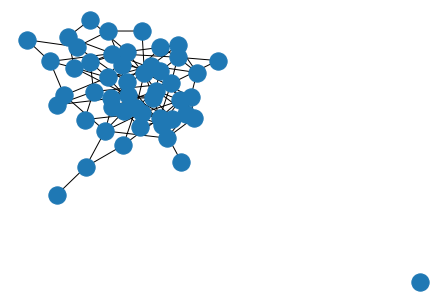

In [3]:
nx.draw(G)
plt.show()

In [ ]:
# Conditioning based on trees
# We can use BFS, choose different starting nodes to create trees
# Similarly with DFS
# Collect all these trees into an array
# Remove duplicates

In [ ]:
# Conditoning based on complete graphs
# Use clique algorithm? Better than brute force
def k_cliques(graph):
    cliques = [{i, j} for i, j in graph.edges() if i!=j]
    k=2
    
    while cliques:
        yield k, cliques
        cliques_1 = set()
        for u,v in combinations(cliques, 2):
            w = u ^ v
            if len(w) == 2 and graph.has_edge(*w):
                cliques_1.add(tuple(u | w))
            # remove duplicates
            cliques = list(map(set, cliques_1))
            k = k+1

In [ ]:
def print_cliques(graph):
    for k, cliques in k_cliques(graph):
        print('$d-cliques: size %d, %s' % (k, len(cliques), cliques[]))

In [ ]:
# Conditioning based on connectedness
all_connected_subgraphs = []
min_size = 5
max_size = 10
# look at components with at least 3 nodes (2 nodes is trivial)
for nb_nodes in range(min_size, max_size):
    for SG in (G.subgraph(selected_nodes) for selected_nodes in itertools.combinations(G, nb_nodes)):
        if nx.is_connected(SG):
            all_connected_subgraphs.append(SG)
            
# Takes a long time to run, should set a limit on size!

In [ ]:
# Use connectedness to find tree; check if there are any cycles
# Use the fact that tree is connected graph with no cycles
all_trees = []

for subgraph in all_connected_subgraphs:
    if nx.algorithms.find_cycle(e):
        all_trees.append(subgraph)

In [76]:
nx.algorithms.find_cycle(G)
A = nx.linalg.graphmatrix.incidence_matrix(G)
A = sp.sparse.csr_matrix.todense(A).transpose()

NameError: name 'G' is not defined

In [ ]:
def find_subgraph(A,edges):
    edge_indices = []
    for edge in edges:
        for i in range(np.shape(A,0)):
            if A[i,edge[0]] != 0 and A[i,edge[1]] != 0:
                edge_indices.append(i)
                
    if len(edges) != len(edge_indices):
        print("Did not find all edges of subgraph in incidence matrix.")
    return edge_indices

In [70]:
# Block RK?
def block(A, sol, b, blocks, N, c):
    k = len(blocks)
    x = c
    errors = []
    for j in range (1, N+1):
        i = randint(k);
        x = x + np.linalg.pinv(A[blocks[i],:])@(b[blocks[i]] - A[blocks[i],:]@x)
        errors.append(np.linalg.norm(x-sol))
    return x, errors

In [71]:
A = np.random.randn(10,2)
sum_of_rows = np.sqrt((A * A).sum(axis=1))
A = A / sum_of_rows[:, np.newaxis]
x = np.ones([2,1])
b = A @ x
np.linalg.norm(A[3,:])

1.0

In [74]:
test_x, test_errs = block(A,x,b,[[0,1],[2,3],[4,5],[6,7],[8,9]],10,np.zeros([2,1]))

x: [[0.]
 [0.]]
[[1.]
 [1.]]
x: [[1.]
 [1.]]
[[-8.04295735e-17]
 [ 3.64955396e-16]]
x: [[1.]
 [1.]]
[[1.39770160e-16]
 [1.36403586e-16]]
x: [[1.]
 [1.]]
[[0.]
 [0.]]
x: [[1.]
 [1.]]
[[0.]
 [0.]]
x: [[1.]
 [1.]]
[[0.]
 [0.]]
x: [[1.]
 [1.]]
[[0.]
 [0.]]
x: [[1.]
 [1.]]
[[0.]
 [0.]]
x: [[1.]
 [1.]]
[[0.]
 [0.]]
x: [[1.]
 [1.]]
[[0.]
 [0.]]


In [75]:
test_errs

[4.440892098500626e-16,
 1.5700924586837752e-16,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
A